# NETW 1013 Clustering Project 

**Objective:** 
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers: 
* Which clustering approach have you decided to use on each dataset? 
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques? 

 
 



Running this project requires the following imports:

In [16]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

%matplotlib inline
# Please refer to the sklearn documentation to learn more about the different parameters for each clustering technique.

In [17]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



In [123]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data. 
* Display the outcome of each value of K. 
* Plot distortion function versus K and choose the approriate value of K. 
* Plot the silhouette_score versus K and use it to choose the best K. 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 
* Comment on the effect of centroid initialization on cluster assignment. 
* Hint: Lookup k-means++ .

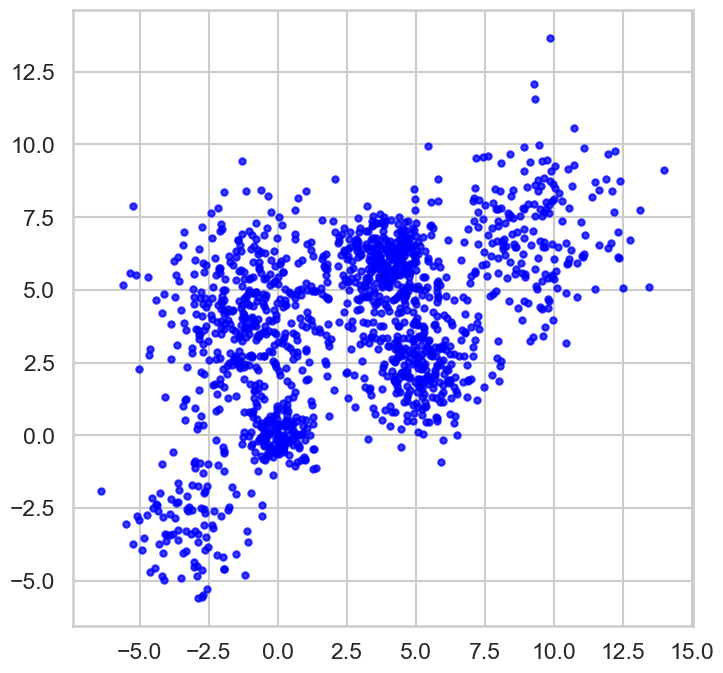

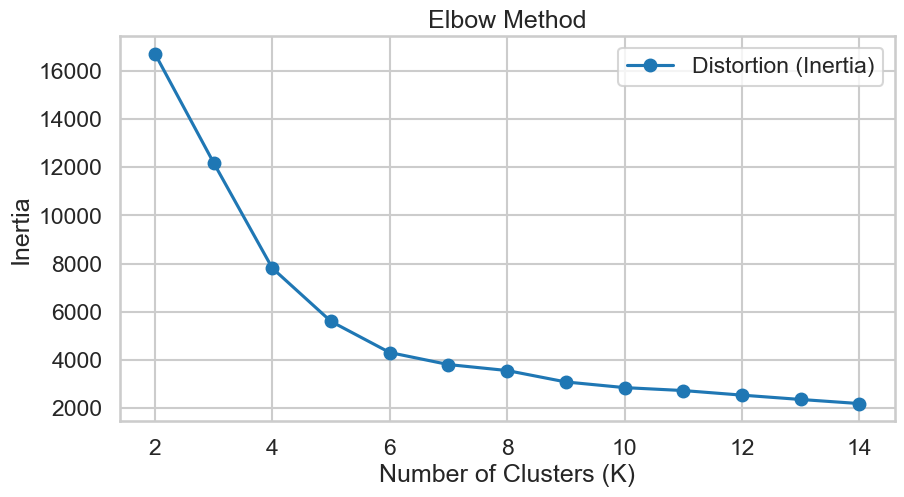

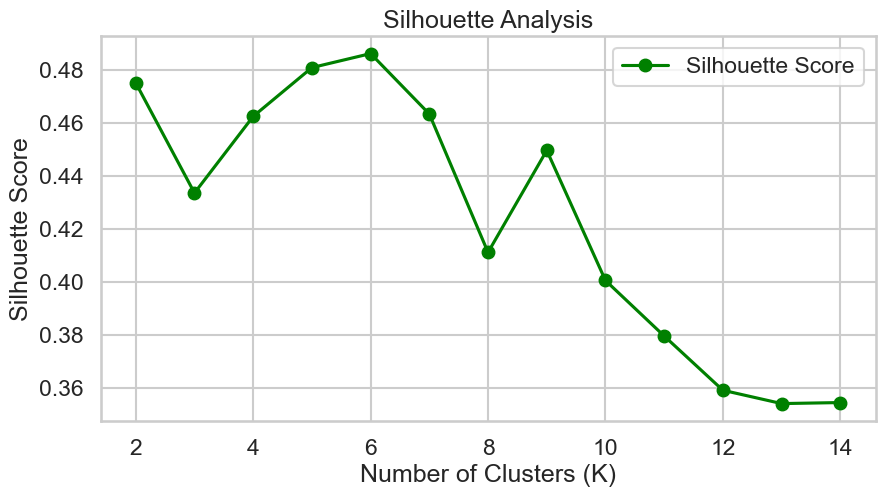

The optimal number of clusters (K) is: 6
Silhouette Score for the best K: 0.4862240839323367


In [21]:
X = Multi_blob_Data
# Define range for K
K_range = range(2, 15)
inertias = []
silhouette_scores = []

# Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score (only for K > 1)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, marker='o', label='Distortion (Inertia)')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='green', label='Silhouette Score')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Find the optimal K
best_k = K_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

print(f"The optimal number of clusters (K) is: {best_k}")
print(f"Silhouette Score for the best K: {best_silhouette_score}")

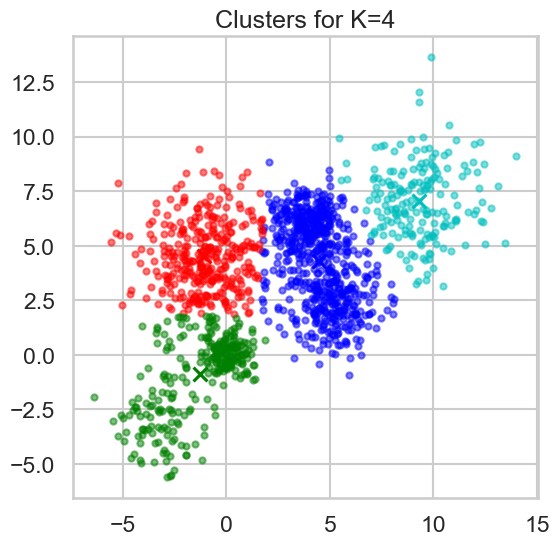

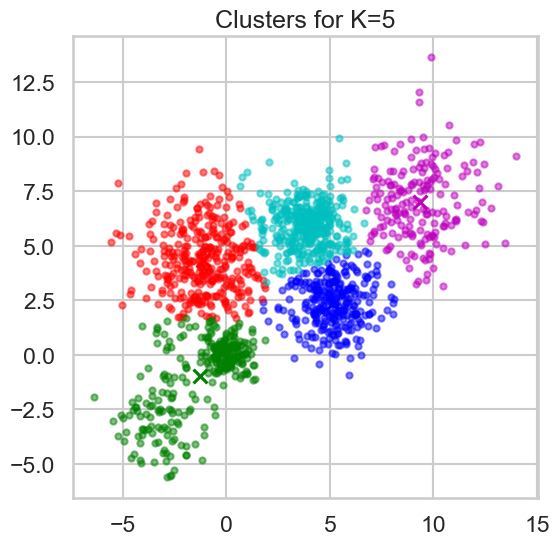

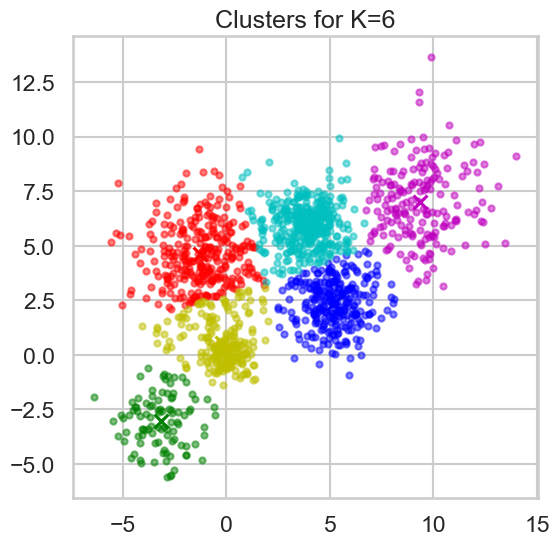

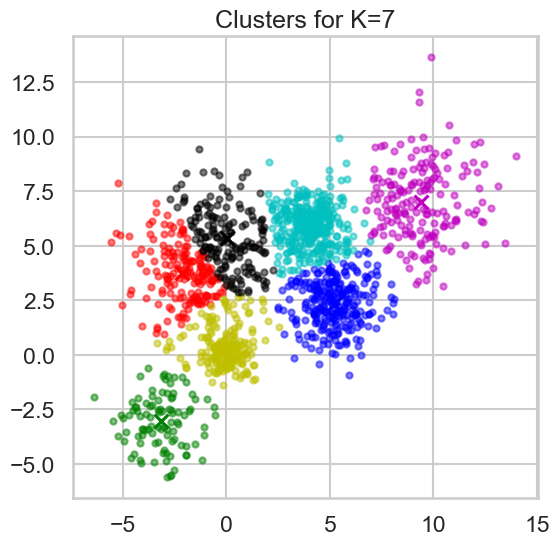

In [22]:
# Define range for K
K_range = range(4, 8)

# Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    # Display the clusters
    plt.figure(figsize=(6, 6))
    display_cluster(X, km=kmeans, num_clusters=k)
    plt.title(f'Clusters for K={k}')
    plt.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation.

Best silhouette score: 0.465 with parameters: {'affinity': 'euclidean', 'linkage': 'ward', 'distance_threshold': 12}
Number of clusters formed: 6


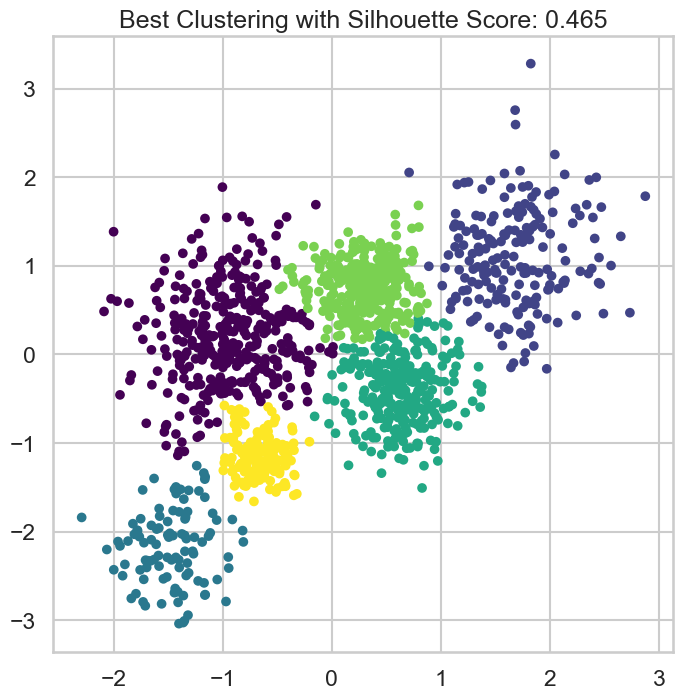

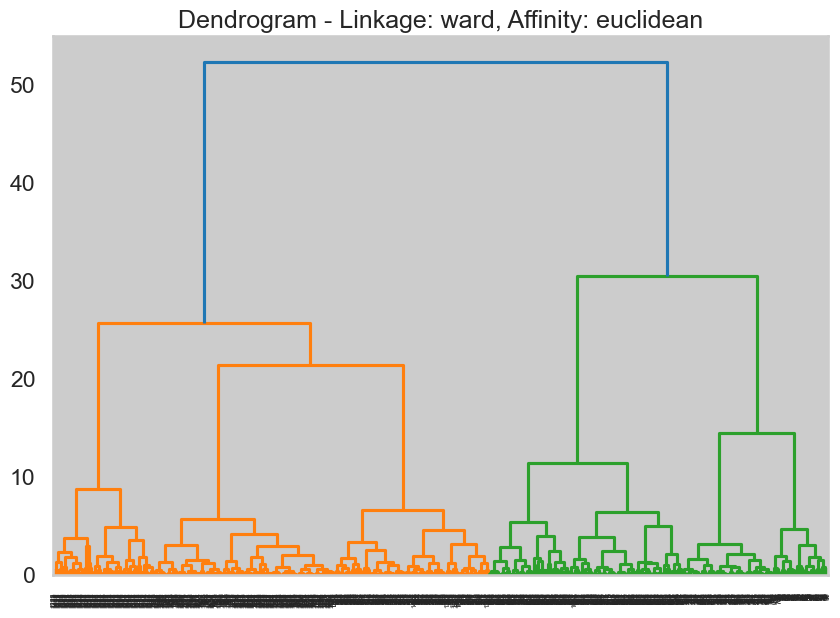

In [41]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


# Scale the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(Multi_blob_Data)

# Best silhouette score tracking
best_score = -1
best_params = {}
best_model = None

# Define combinations of parameters to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkage_methods = ['ward', 'complete', 'average', 'single']  # Renamed to avoid conflict with scipy linkage function
distance_thresholds = np.arange(5, 15)  

# Try each combination of parameters
for affinity in affinities:
    for linkage_method in linkage_methods:  # Use the renamed variable
        for distance_threshold in distance_thresholds:
            if linkage_method == "ward" and affinity != "euclidean":
                continue
            
            model = AgglomerativeClustering(metric=affinity, linkage=linkage_method, distance_threshold=distance_threshold, n_clusters=None)
            model.fit(df_scaled)

            # Calculate silhouette score
            if len(set(model.labels_)) > 1:  # More than one cluster required for silhouette score
                score = silhouette_score(df_scaled, model.labels_)
                #print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance_threshold: {distance_threshold} -> Silhouette Score: {score:.3f}")
                
                # Track the best configuration
                if score > best_score:
                    best_score = score
                    best_params = {'affinity': affinity, 'linkage': linkage_method, 'distance_threshold': distance_threshold}
                    best_model = model

print(f"Best silhouette score: {best_score:.3f} with parameters: {best_params}")

# Train the best model with the best parameters on the scaled data
best_model = AgglomerativeClustering(metric=best_params['affinity'], linkage=best_params['linkage'], 
                                     distance_threshold=best_params['distance_threshold'], n_clusters=None)
best_model.fit(df_scaled)

# Print the number of clusters found by the best model
n_clusters = len(set(best_model.labels_))
print(f"Number of clusters formed: {n_clusters}")

# Display clusters for the best model
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=best_model.labels_, cmap="viridis", s=30)
plt.title(f"Best Clustering with Silhouette Score: {best_score:.3f}")
plt.show()

# Plot the dendrogram for the best configuration
Z = linkage(df_scaled, method=best_params['linkage'], metric=best_params['affinity'])
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title(f"Dendrogram - Linkage: {best_params['linkage']}, Affinity: {best_params['affinity']}")
plt.show()


### DBScan
* Use DBScan function to  to cluster the above data. 
* In the  DBscan change the following parameters: 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case. 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments. 

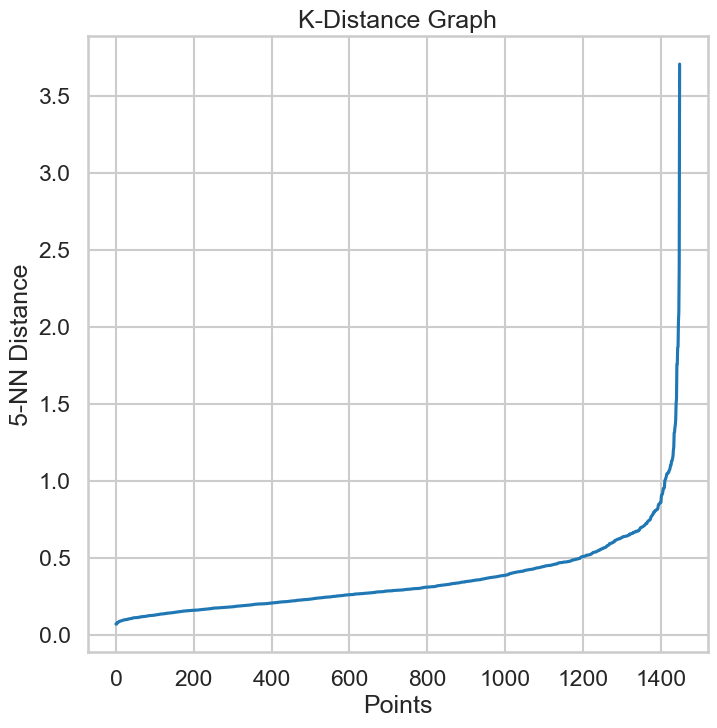

In [43]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Compute distances
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(Multi_blob_Data)
distances, indices = neighbors_fit.kneighbors(Multi_blob_Data)

# Sort and plot distances
distances = np.sort(distances[:, -1], axis=0)
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('5-NN Distance')
plt.title('K-Distance Graph')
plt.show()

Best Parameters (EPS, min_samples): (0.30000000000000004, 18)
Best Silhouette Score: 0.3038104049605378
Number of Clusters for Best Parameters: 2


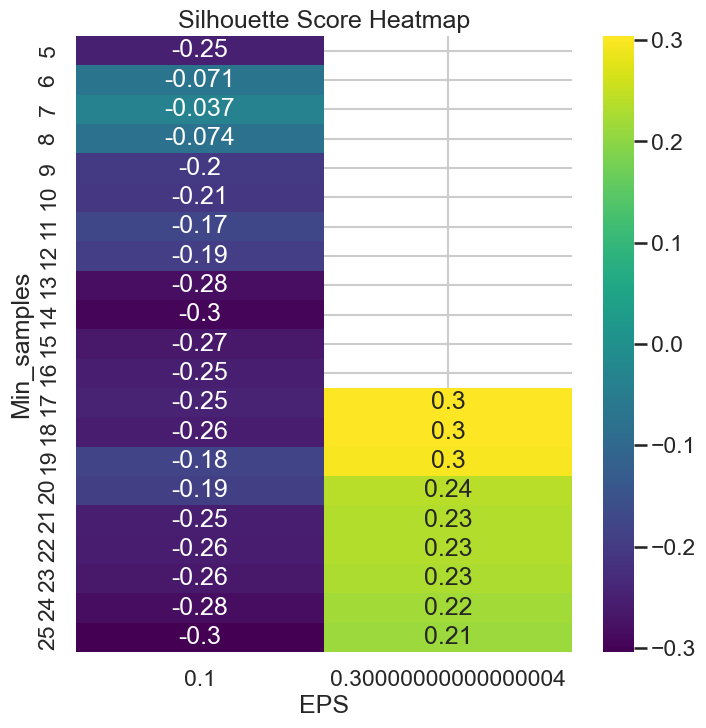

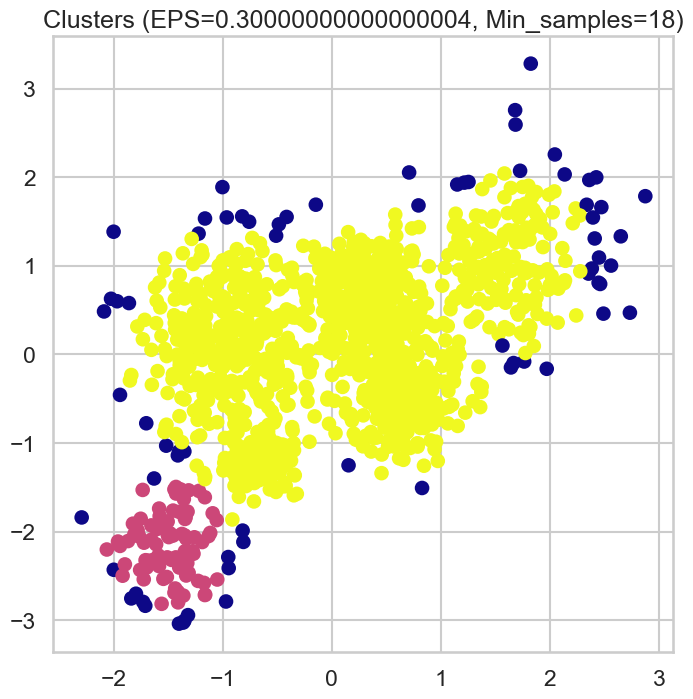

In [61]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

scaler = StandardScaler()
df_scaled = scaler.fit_transform(Multi_blob_Data)

results = []

# Define ranges for EPS and min_samples
eps_values = np.arange(0.1, 3, 0.2)
min_samples_values = range(5, 26)

for eps in eps_values:
    for min_samples in min_samples_values:
        # Fit DBSCAN model
        model = DBSCAN(eps=eps, min_samples=min_samples).fit(df_scaled)
        labels = model.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise points

        # Calculate silhouette score if there is more than one cluster
        if n_clusters > 1:
            score = silhouette_score(df_scaled, labels)
            results.append((eps, min_samples, score, n_clusters))

# Find the best parameters based on silhouette score
best_params = max(results, key=lambda x: x[2])
print("Best Parameters (EPS, min_samples):", best_params[0:2])
print("Best Silhouette Score:", best_params[2])
print("Number of Clusters for Best Parameters:", best_params[3])

import seaborn as sns

# Convert results into DataFrame with only the relevant columns
results_df = pd.DataFrame(results, columns=['EPS', 'Min_samples', 'Silhouette_score', 'Number_of_Clusters'])

# Drop the 'Number_of_Clusters' column to focus on the three relevant columns
results_df = results_df[['EPS', 'Min_samples', 'Silhouette_score']]

# Plot Silhouette_score heatmap
pivot_table = results_df.pivot(index="Min_samples", columns="EPS", values="Silhouette_score")
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.title("Silhouette Score Heatmap")
plt.show()

best_eps, best_min_samples, _, n = best_params
model = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(df_scaled)
labels = model.labels_

# Plot clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap='plasma')
plt.title(f"Clusters (EPS={best_eps}, Min_samples={best_min_samples})")
plt.show()

The best method was kmeans with the highest silhouette score of 0.48614459735646176 with 6 clusters

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers. 

The data represents three classes. 


In [64]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data. 
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches. 
* Is your clustering outcome consistent with the labels?

In [66]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Kmeans

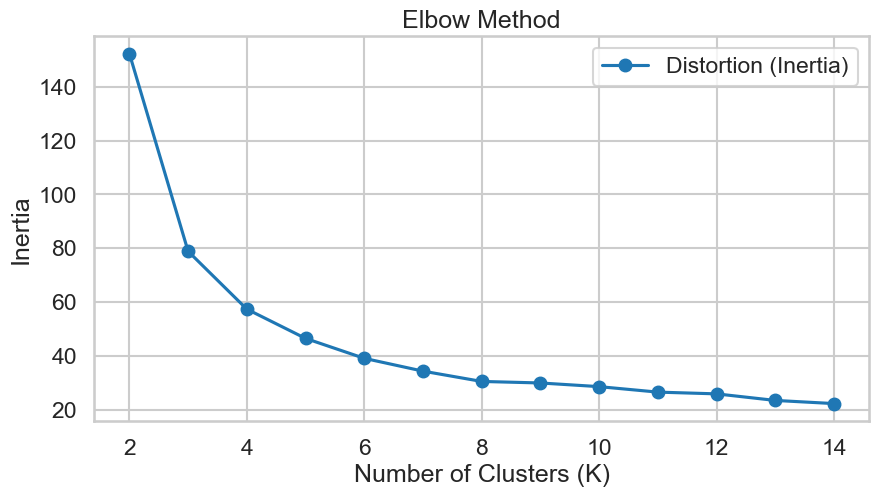

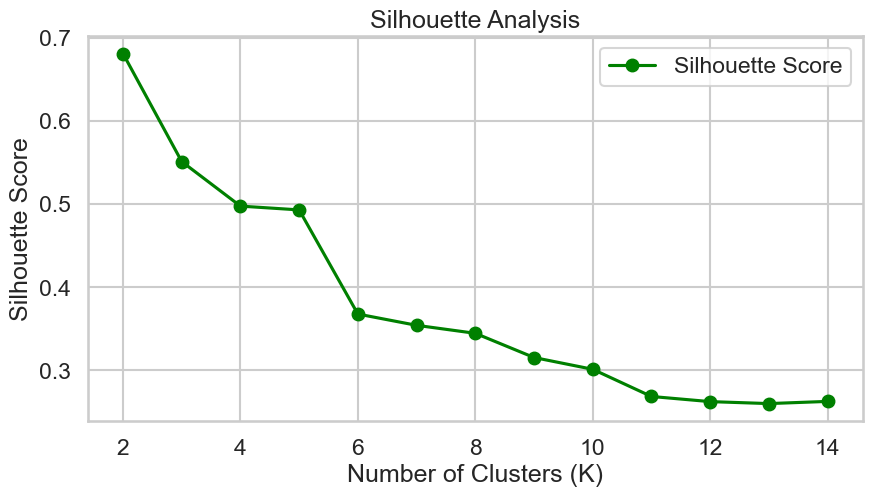

The optimal number of clusters (K) is: 2
Silhouette Score for the best K: 0.6810461692117461


In [68]:
X = iris_data.data
# Define range for K
K_range = range(2, 15)
inertias = []
silhouette_scores = []

# Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score (only for K > 1)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, marker='o', label='Distortion (Inertia)')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='green', label='Silhouette Score')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Find the optimal K
best_k = K_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

print(f"The optimal number of clusters (K) is: {best_k}")
print(f"Silhouette Score for the best K: {best_silhouette_score}")

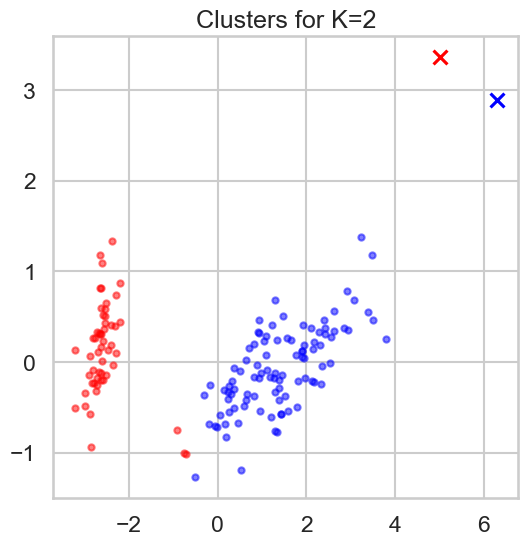

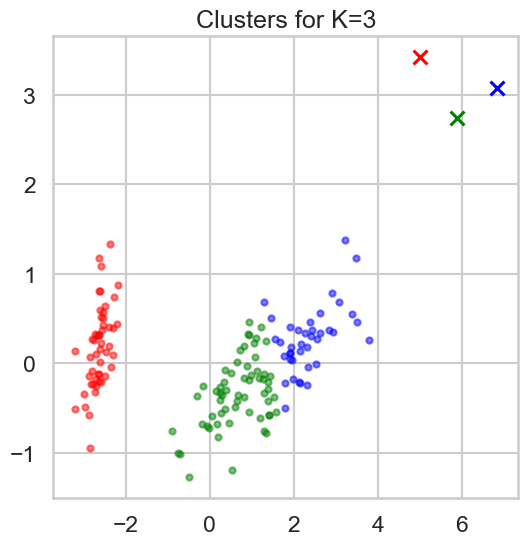

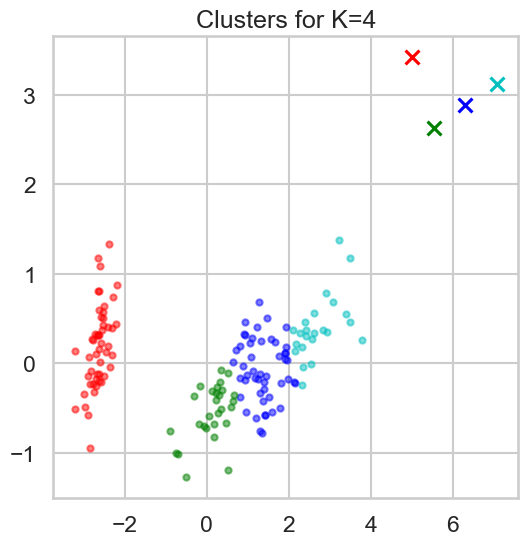

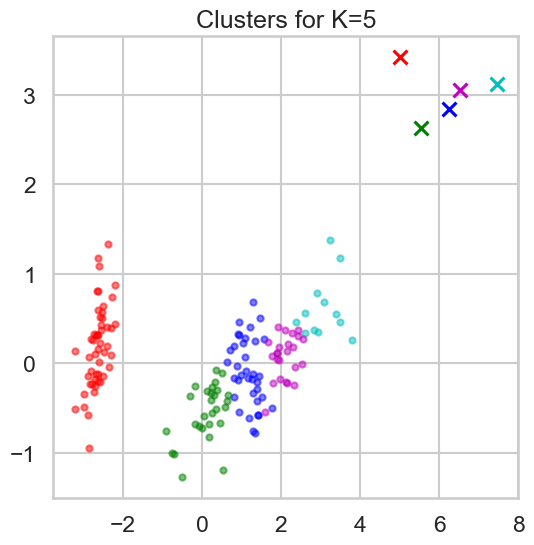

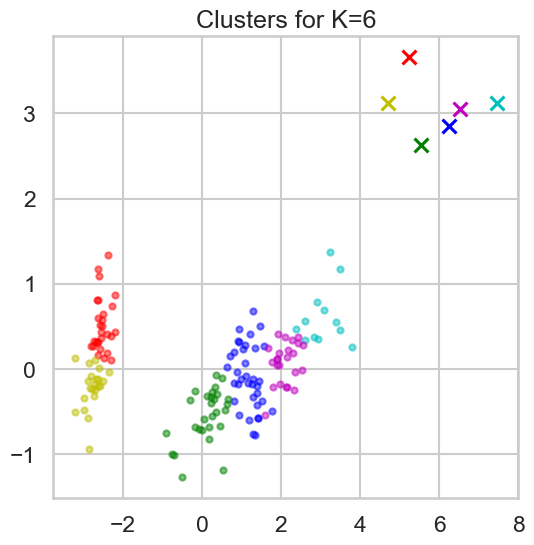

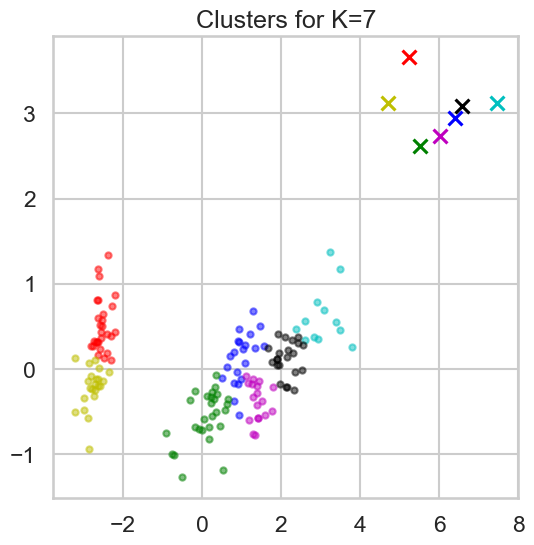

In [82]:
from sklearn.decomposition import PCA

iris = iris_data.data

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris)


# Define range for K
K_range = range(2, 8)

# Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    # Display the clusters
    plt.figure(figsize=(6, 6))
    display_cluster(iris_pca, km=kmeans, num_clusters=k)
    plt.title(f'Clusters for K={k}')
    plt.show()

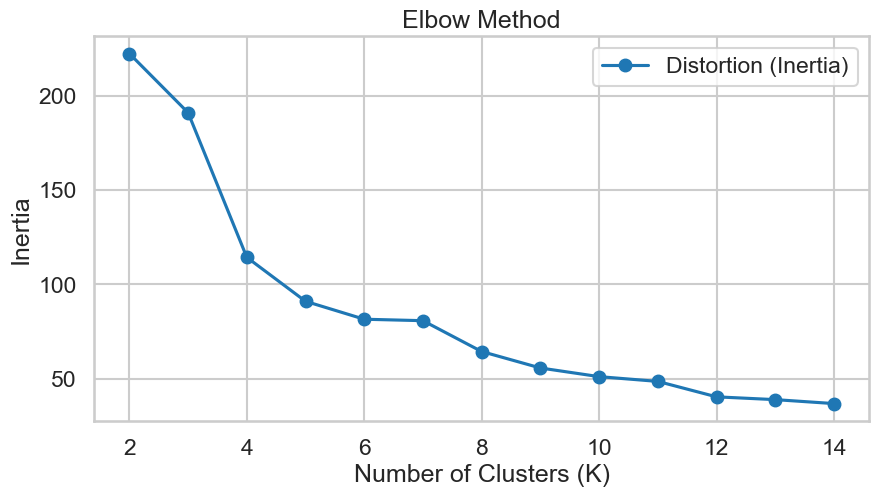

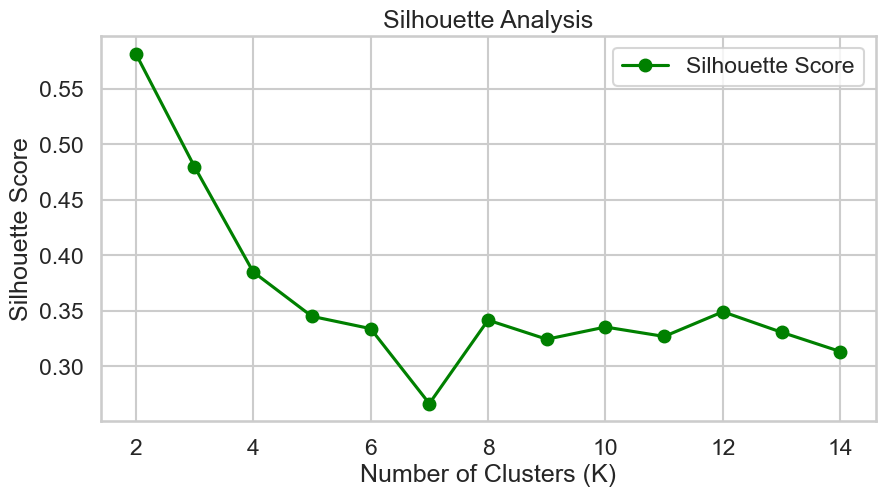

The optimal number of clusters (K) is: 2
Silhouette Score for the best K: 0.5817500491982808


In [83]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(X)

# Define range for K
K_range = range(2, 15)
inertias = []
silhouette_scores = []

# Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(iris_scaled)
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score (only for K > 1)
    score = silhouette_score(iris_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, marker='o', label='Distortion (Inertia)')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='green', label='Silhouette Score')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Find the optimal K
best_k = K_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

print(f"The optimal number of clusters (K) is: {best_k}")
print(f"Silhouette Score for the best K: {best_silhouette_score}")

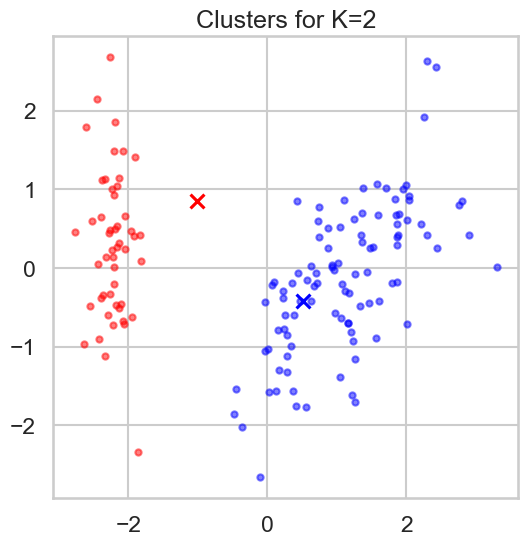

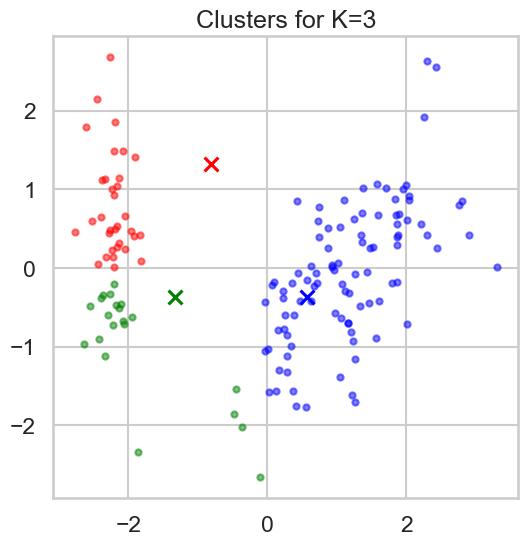

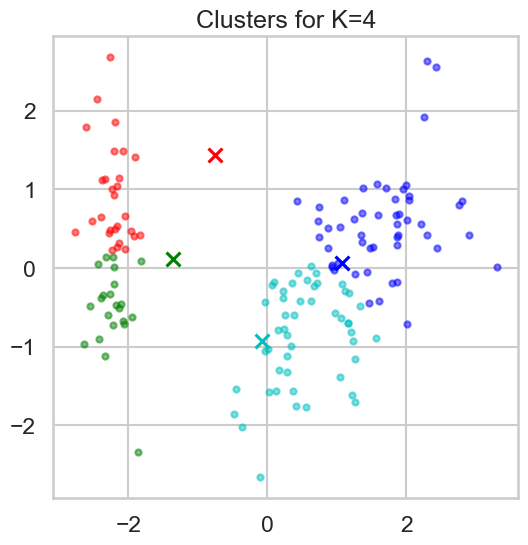

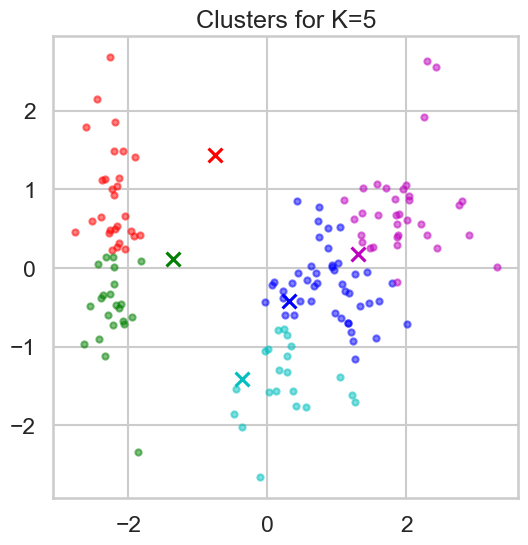

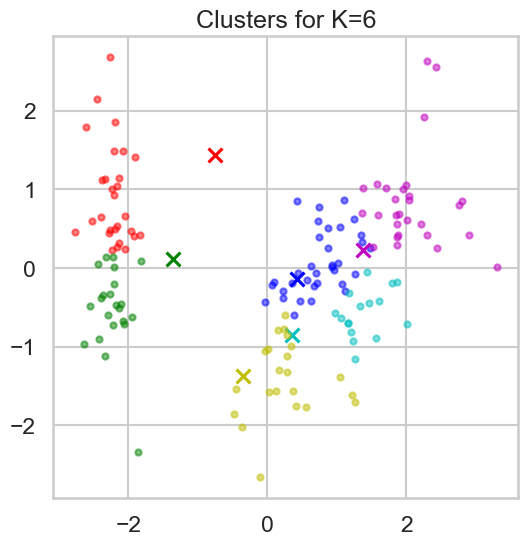

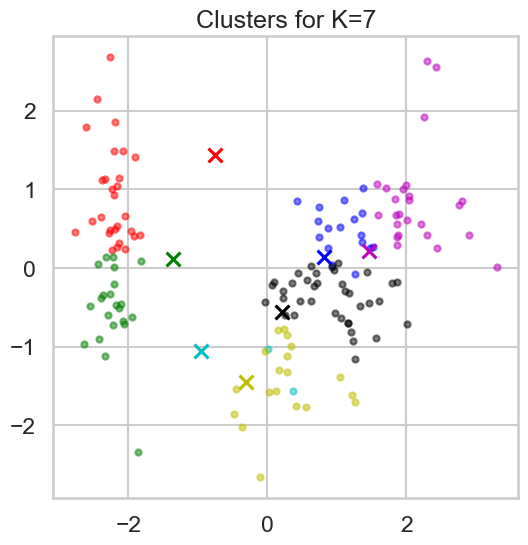

In [84]:
# Define range for K
K_range = range(2, 8)

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
iris_scaled_pca = pca.fit_transform(iris_scaled)

# Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(iris_scaled)
    
    # Display the clusters
    plt.figure(figsize=(6, 6))
    display_cluster(iris_scaled_pca, km=kmeans, num_clusters=k)
    plt.title(f'Clusters for K={k}')
    plt.show()

# Agglomerative

Best silhouette score: 0.687 with parameters: {'affinity': 'euclidean', 'linkage': 'ward', 'distance_threshold': 13}
Number of clusters formed: 2


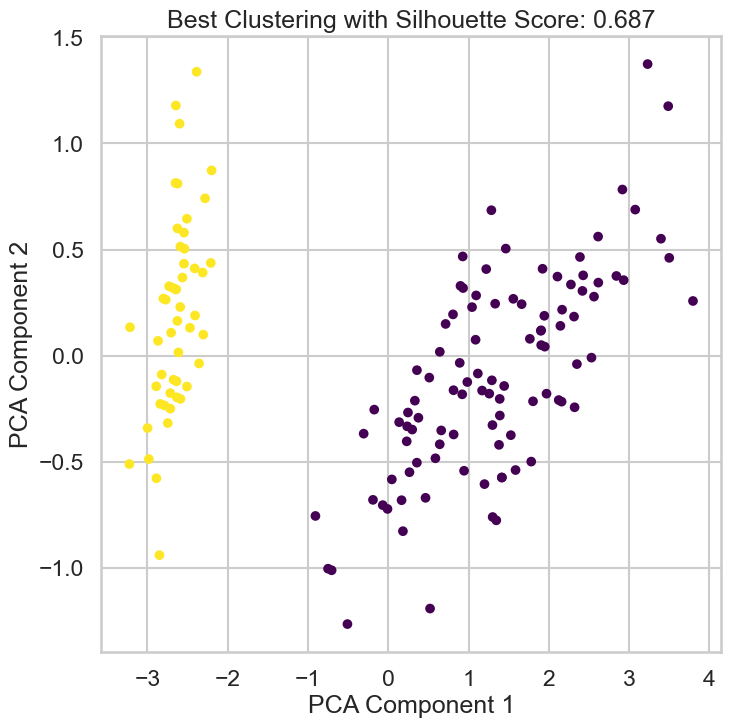

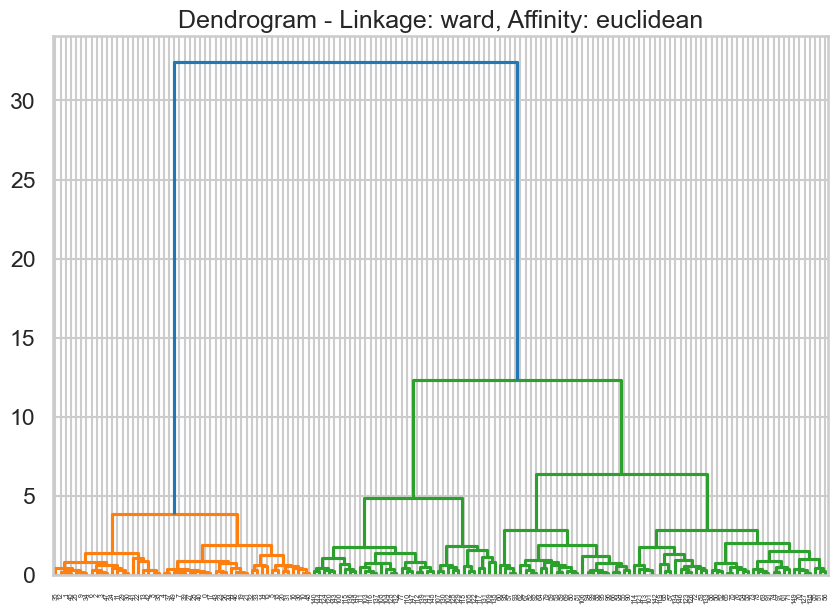

In [86]:
iris = iris_data.data

# Best silhouette score tracking
best_score = -1
best_params = {}
best_model = None

# Define combinations of parameters to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkage_methods = ['ward', 'complete', 'average', 'single']  # Renamed to avoid conflict with scipy linkage function
distance_thresholds = np.arange(5, 15)  

# Try each combination of parameters
for affinity in affinities:
    for linkage_method in linkage_methods:  # Use the renamed variable
        for distance_threshold in distance_thresholds:
            if linkage_method == "ward" and affinity != "euclidean":
                continue
            
            model = AgglomerativeClustering(metric=affinity, linkage=linkage_method, distance_threshold=distance_threshold, n_clusters=None)
            model.fit(iris)

            # Calculate silhouette score
            if len(set(model.labels_)) > 1:  # More than one cluster required for silhouette score
                score = silhouette_score(iris, model.labels_)
                #print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance_threshold: {distance_threshold} -> Silhouette Score: {score:.3f}")
                
                # Track the best configuration
                if score > best_score:
                    best_score = score
                    best_params = {'affinity': affinity, 'linkage': linkage_method, 'distance_threshold': distance_threshold}
                    best_model = model

print(f"Best silhouette score: {best_score:.3f} with parameters: {best_params}")

# Train the best model with the best parameters on the scaled data
best_model = AgglomerativeClustering(metric=best_params['affinity'], linkage=best_params['linkage'], 
                                     distance_threshold=best_params['distance_threshold'], n_clusters=None)
best_model.fit(iris)

# Print the number of clusters found by the best model
n_clusters = len(set(best_model.labels_))
print(f"Number of clusters formed: {n_clusters}")

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris)

plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=best_model.labels_, cmap="viridis", s=30)
plt.title(f"Best Clustering with Silhouette Score: {best_score:.3f}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Plot the dendrogram for the best configuration
Z = linkage(iris, method=best_params['linkage'], metric=best_params['affinity'])
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title(f"Dendrogram - Linkage: {best_params['linkage']}, Affinity: {best_params['affinity']}")
plt.show()



Best silhouette score: 0.582 with parameters: {'affinity': 'manhattan', 'linkage': 'average', 'distance_threshold': 4}


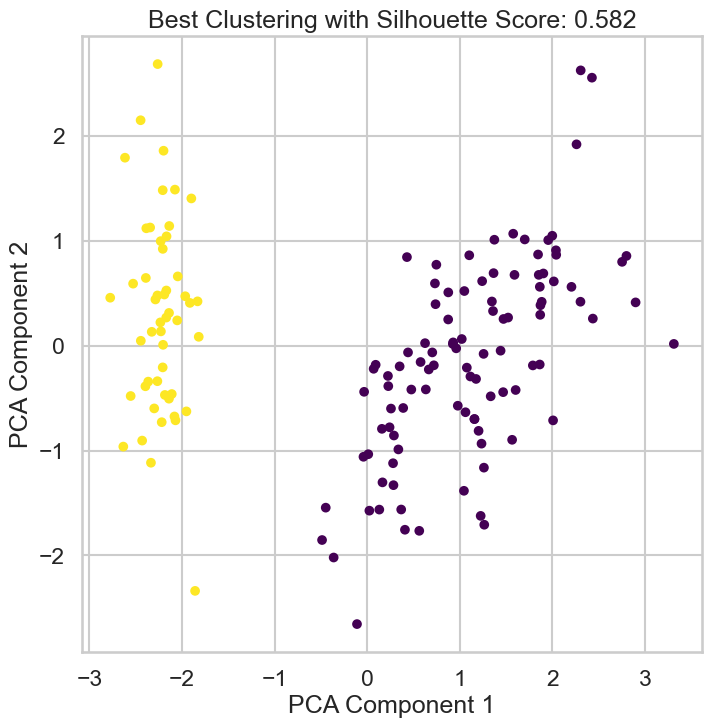

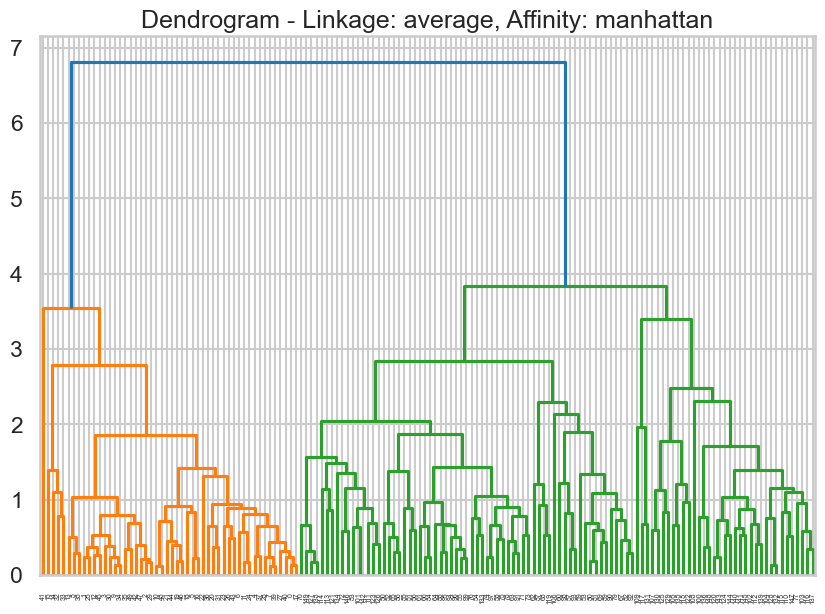

In [87]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)

# Best silhouette score tracking
best_score = -1
best_params = {}
best_model = None

# Define combinations of parameters to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkage_methods = ['ward', 'complete', 'average', 'single']
distance_thresholds = np.arange(1, 5)

# Try each combination of parameters
for affinity in affinities:
    for linkage_method in linkage_methods:
        for distance_threshold in distance_thresholds:
            if linkage_method == "ward" and affinity != "euclidean":
                continue  # Ward only works with Euclidean
            
            model = AgglomerativeClustering(metric=affinity, linkage=linkage_method, 
                                            distance_threshold=distance_threshold, n_clusters=None)
            model.fit(iris_scaled)
            
            # Calculate silhouette score
            if len(set(model.labels_)) > 1:  # Silhouette requires more than one cluster
                score = silhouette_score(iris_scaled, model.labels_)
                
                # Track the best configuration
                if score > best_score:
                    best_score = score
                    best_params = {'affinity': affinity, 'linkage': linkage_method, 'distance_threshold': distance_threshold}
                    best_model = model

print(f"Best silhouette score: {best_score:.3f} with parameters: {best_params}")

# Train the best model with the best parameters on the scaled data
best_model = AgglomerativeClustering(metric=best_params['affinity'], linkage=best_params['linkage'], 
                                     distance_threshold=best_params['distance_threshold'], n_clusters=None)
best_model.fit(iris_scaled)

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
iris_scaled_pca = pca.fit_transform(iris_scaled)

plt.scatter(iris_scaled_pca[:, 0], iris_scaled_pca[:, 1], c=best_model.labels_, cmap="viridis", s=30)
plt.title(f"Best Clustering with Silhouette Score: {best_score:.3f}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Plot the dendrogram for the best configuration
Z = linkage(iris_scaled, method=best_params['linkage'], metric='cityblock')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title(f"Dendrogram - Linkage: {best_params['linkage']}, Affinity: {best_params['affinity']}")
plt.show()

# DBSCAN

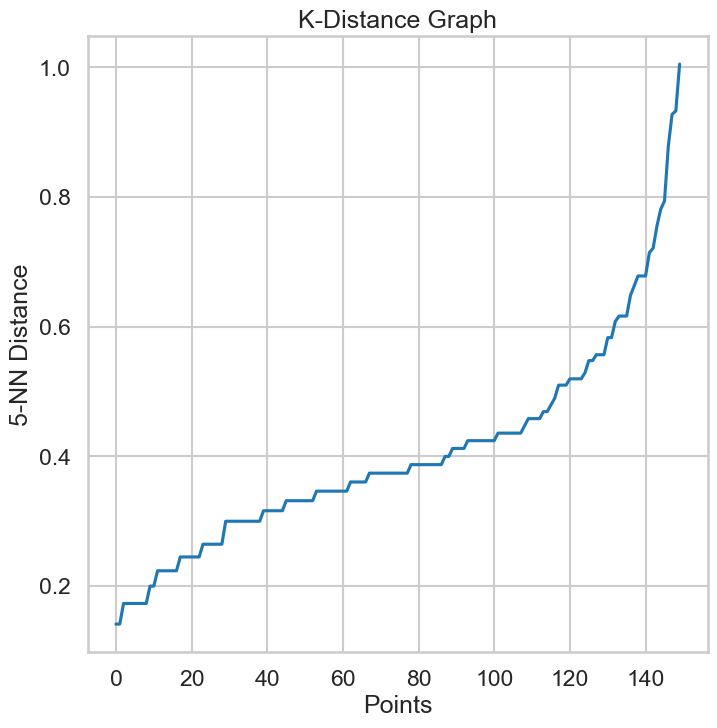

In [89]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Compute distances
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(iris)
distances, indices = neighbors_fit.kneighbors(iris)

# Sort and plot distances
distances = np.sort(distances[:, -1], axis=0)
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('5-NN Distance')
plt.title('K-Distance Graph')
plt.show()

Best Parameters (EPS, min_samples): (0.9000000000000001, 5)
Best Silhouette Score: 0.6867350732769776
Number of Clusters for Best Parameters: 2


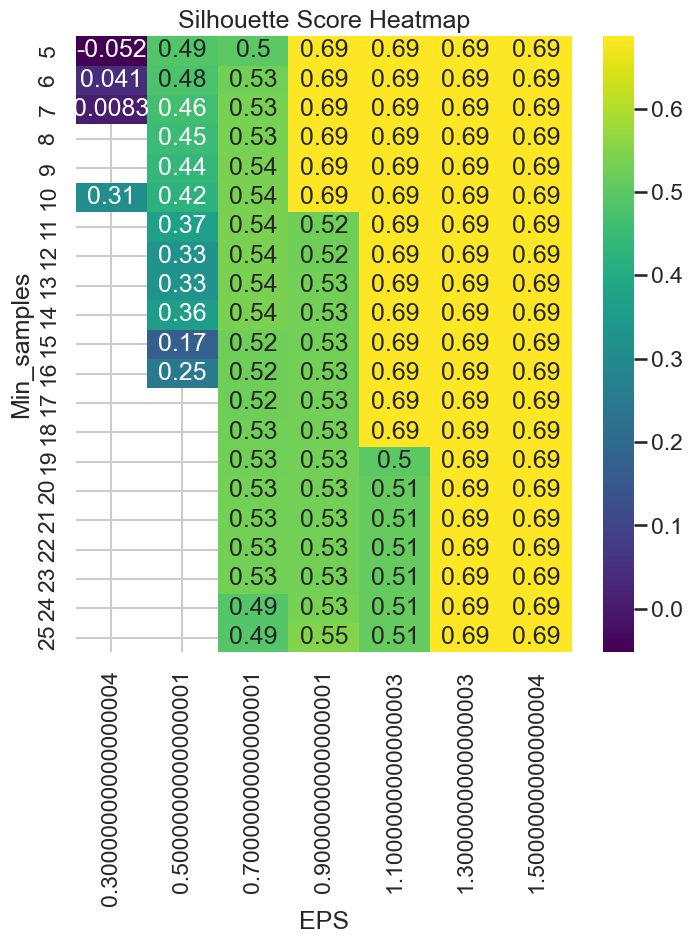

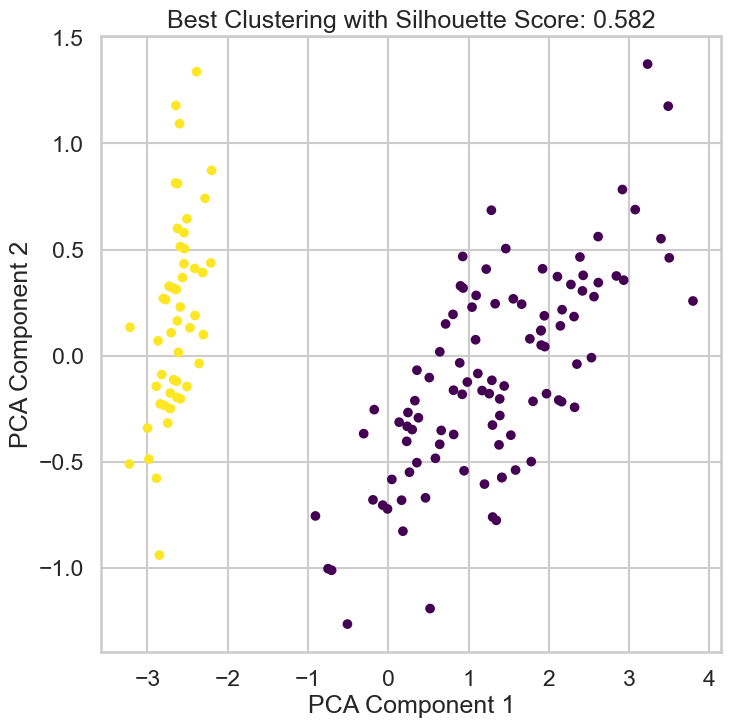

In [90]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

results = []

# Define ranges for EPS and min_samples
eps_values = np.arange(0.1, 3, 0.2)
min_samples_values = range(5, 26)

for eps in eps_values:
    for min_samples in min_samples_values:
        # Fit DBSCAN model
        model = DBSCAN(eps=eps, min_samples=min_samples).fit(iris)
        labels = model.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise points

        # Calculate silhouette score if there is more than one cluster
        if n_clusters > 1:
            score = silhouette_score(iris, labels)
            results.append((eps, min_samples, score, n_clusters))

# Find the best parameters based on silhouette score
best_params = max(results, key=lambda x: x[2])
print("Best Parameters (EPS, min_samples):", best_params[0:2])
print("Best Silhouette Score:", best_params[2])
print("Number of Clusters for Best Parameters:", best_params[3])

import seaborn as sns

# Convert results into DataFrame with only the relevant columns
results_df = pd.DataFrame(results, columns=['EPS', 'Min_samples', 'Silhouette_score', 'Number_of_Clusters'])

# Drop the 'Number_of_Clusters' column to focus on the three relevant columns
results_df = results_df[['EPS', 'Min_samples', 'Silhouette_score']]

# Plot Silhouette_score heatmap
pivot_table = results_df.pivot(index="Min_samples", columns="EPS", values="Silhouette_score")
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.title("Silhouette Score Heatmap")
plt.show()

best_eps, best_min_samples, _, n = best_params
model = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(iris)
labels = model.labels_

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris)

plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=best_model.labels_, cmap="viridis", s=30)
plt.title(f"Best Clustering with Silhouette Score: {best_score:.3f}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

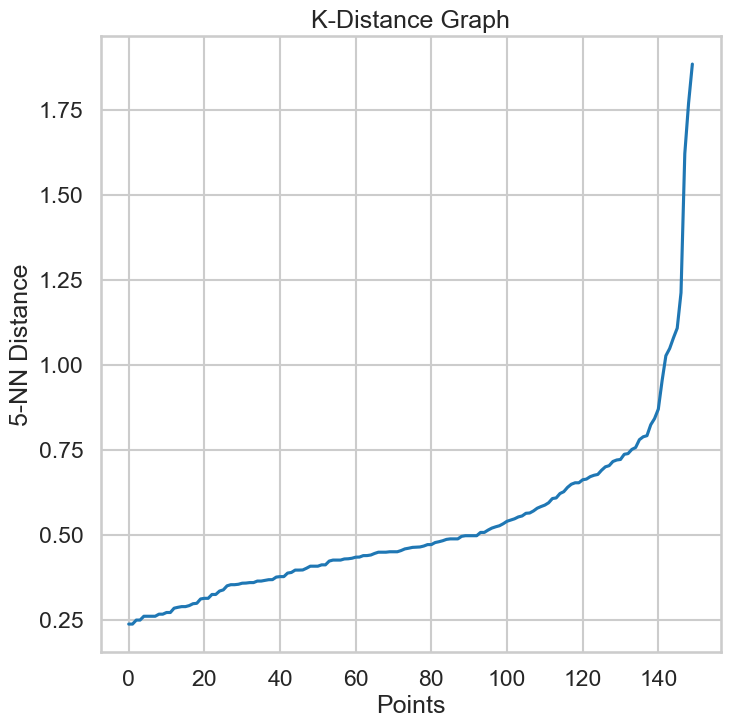

In [91]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Compute distances
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(iris_scaled)
distances, indices = neighbors_fit.kneighbors(iris_scaled)

# Sort and plot distances
distances = np.sort(distances[:, -1], axis=0)
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('5-NN Distance')
plt.title('K-Distance Graph')
plt.show()

Best Parameters (EPS, min_samples): (1.5000000000000004, 5)
Best Silhouette Score: 0.5817500491982808
Number of Clusters for Best Parameters: 2


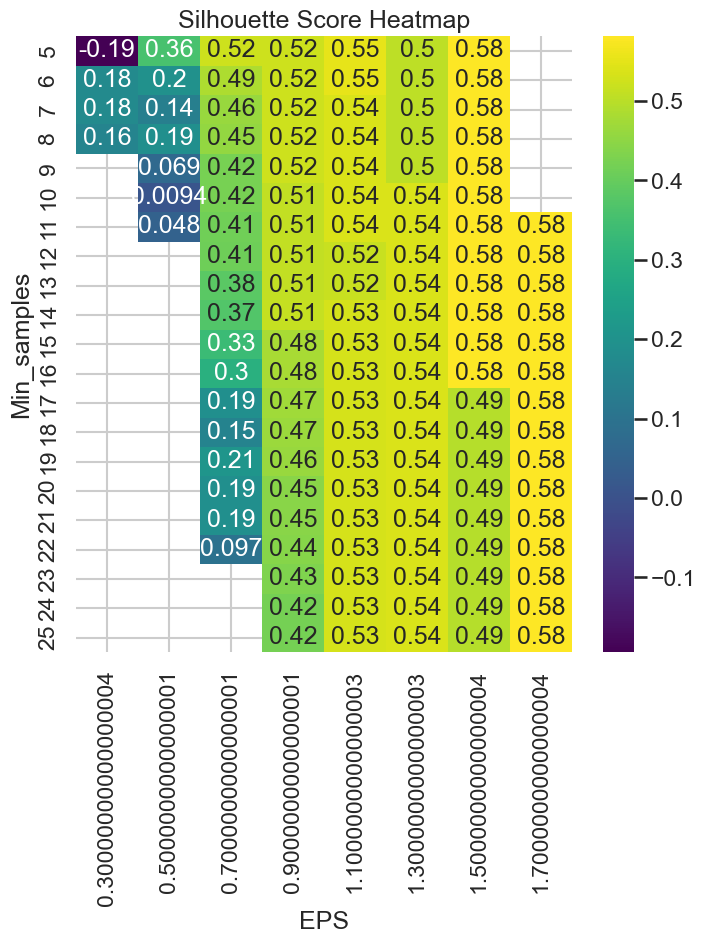

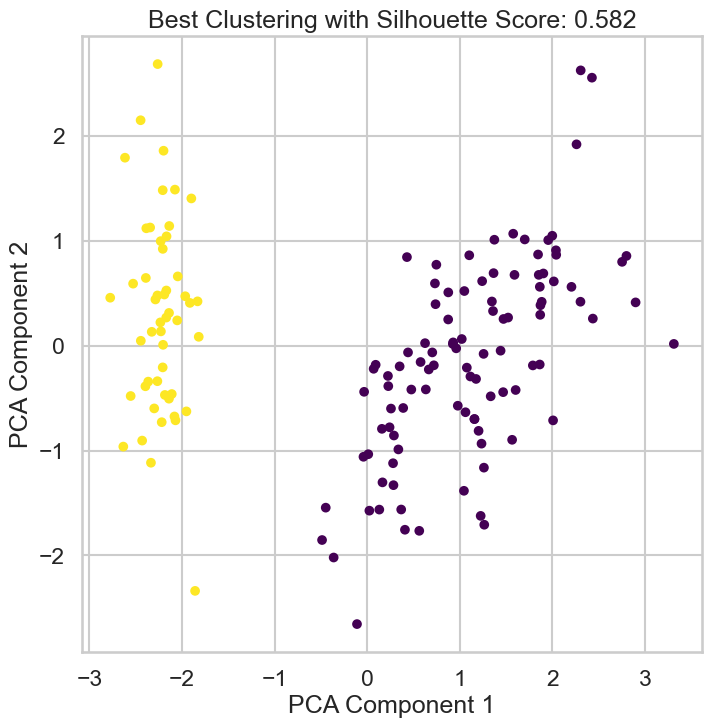

In [92]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

results = []

# Define ranges for EPS and min_samples
eps_values = np.arange(0.1, 3, 0.2)
min_samples_values = range(5, 26)

for eps in eps_values:
    for min_samples in min_samples_values:
        # Fit DBSCAN model
        model = DBSCAN(eps=eps, min_samples=min_samples).fit(iris_scaled)
        labels = model.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise points

        # Calculate silhouette score if there is more than one cluster
        if n_clusters > 1:
            score = silhouette_score(iris_scaled, labels)
            results.append((eps, min_samples, score, n_clusters))

# Find the best parameters based on silhouette score
best_params = max(results, key=lambda x: x[2])
print("Best Parameters (EPS, min_samples):", best_params[0:2])
print("Best Silhouette Score:", best_params[2])
print("Number of Clusters for Best Parameters:", best_params[3])

import seaborn as sns

# Convert results into DataFrame with only the relevant columns
results_df = pd.DataFrame(results, columns=['EPS', 'Min_samples', 'Silhouette_score', 'Number_of_Clusters'])

# Drop the 'Number_of_Clusters' column to focus on the three relevant columns
results_df = results_df[['EPS', 'Min_samples', 'Silhouette_score']]

# Plot Silhouette_score heatmap
pivot_table = results_df.pivot(index="Min_samples", columns="EPS", values="Silhouette_score")
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.title("Silhouette Score Heatmap")
plt.show()

best_eps, best_min_samples, _, n = best_params
model = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(iris_scaled)
labels = model.labels_

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
iris_scaled_pca = pca.fit_transform(iris_scaled)

plt.scatter(iris_scaled_pca[:, 0], iris_scaled_pca[:, 1], c=best_model.labels_, cmap="viridis", s=30)
plt.title(f"Best Clustering with Silhouette Score: {best_score:.3f}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [93]:
noise_points = sum(labels == -1)
print(f"Number of noise points: {noise_points}")

Number of noise points: 0


## Customer dataset
Repeat all the above on the customer data set 

In [98]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

cus = pd.read_csv('customer_data.csv')

cus = cus.drop(columns=['ID'])

scaler = MinMaxScaler()

cus_scaled = scaler.fit_transform(cus)

In [100]:
cus.head()

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

In [101]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [102]:
cus_scaled

array([[0.        , 0.        , 0.84482759, ..., 0.32478101, 0.5       ,
        1.        ],
       [1.        , 1.        , 0.06896552, ..., 0.42021043, 0.5       ,
        1.        ],
       [0.        , 0.        , 0.53448276, ..., 0.19514353, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.22413793, ..., 0.18487051, 0.        ,
        0.        ],
       [1.        , 1.        , 0.10344828, ..., 0.22716172, 0.        ,
        0.        ],
       [0.        , 0.        , 0.12068966, ..., 0.11912317, 0.        ,
        0.        ]])

# Kmeans

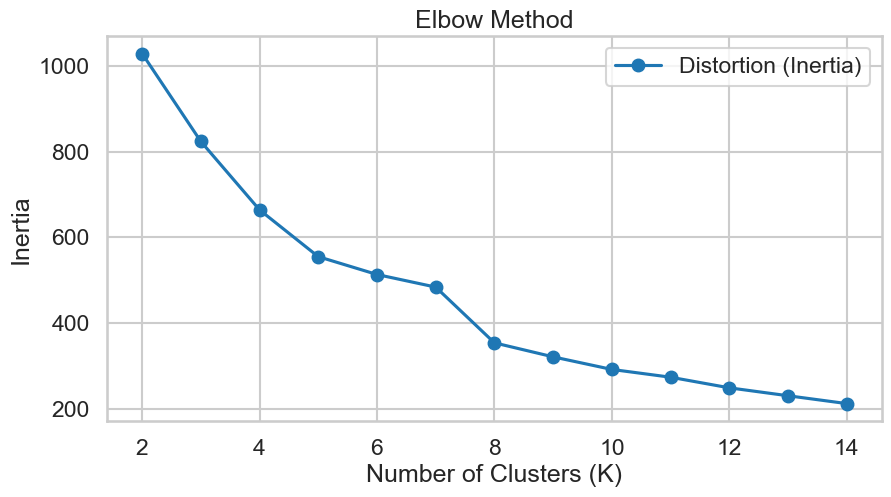

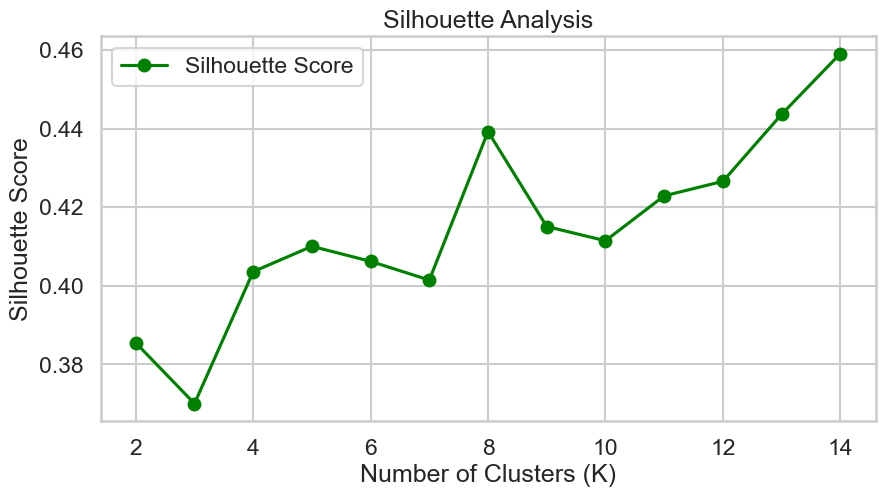

The optimal number of clusters (K) is: 14
Silhouette Score for the best K: 0.4590519450475174


In [104]:
# Define range for K
K_range = range(2, 15)
inertias = []
silhouette_scores = []

# Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(cus_scaled)
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score (only for K > 1)
    score = silhouette_score(cus_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, marker='o', label='Distortion (Inertia)')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='green', label='Silhouette Score')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Find the optimal K
best_k = K_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

print(f"The optimal number of clusters (K) is: {best_k}")
print(f"Silhouette Score for the best K: {best_silhouette_score}")

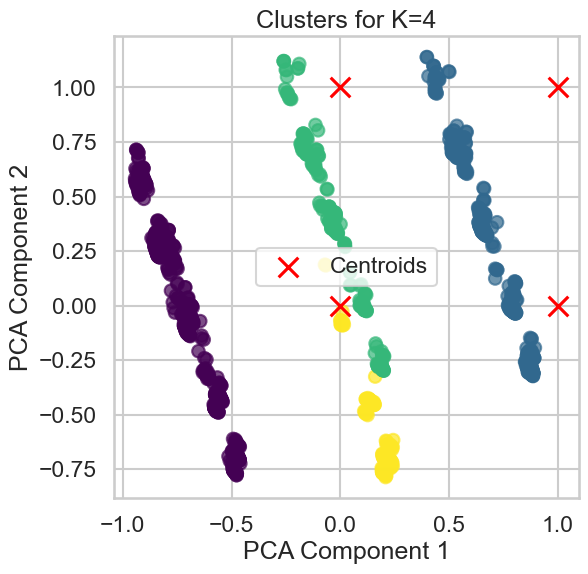

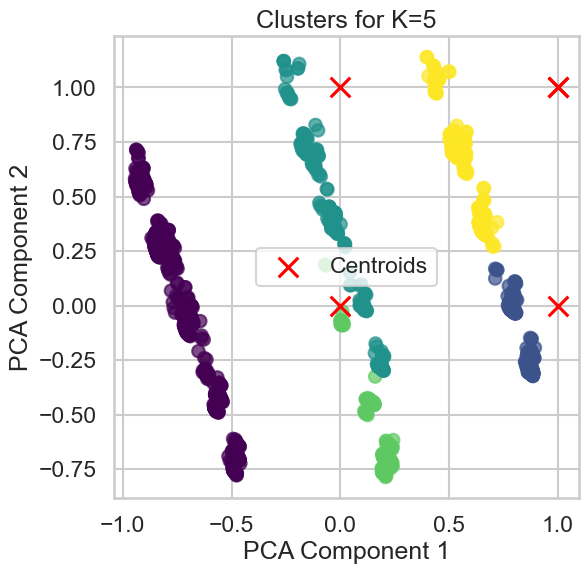

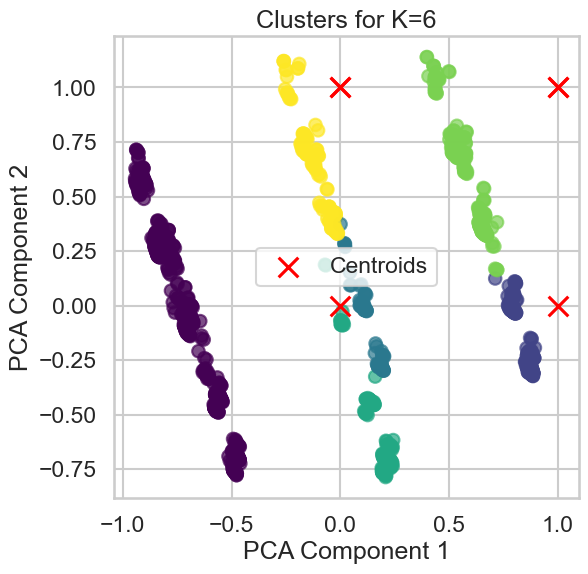

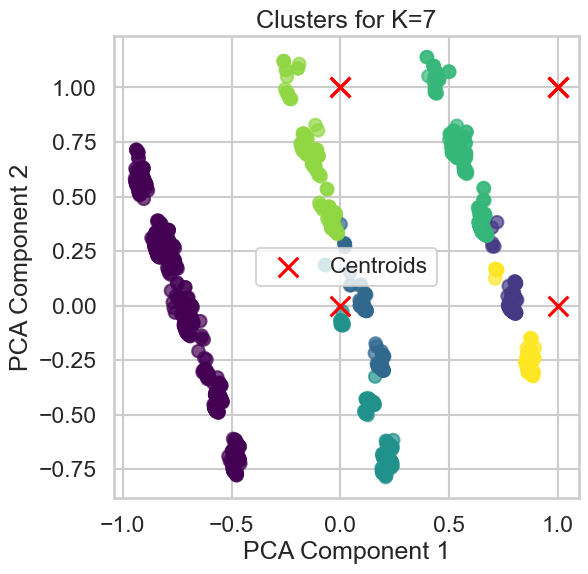

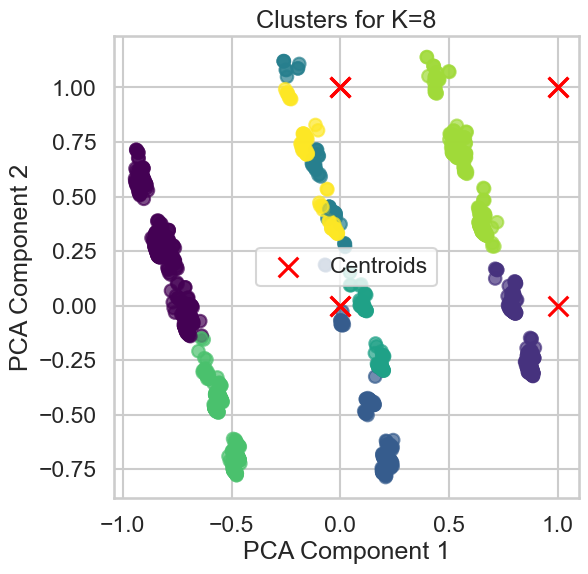

In [105]:
def display_clusterPCA(data, km, num_clusters):
    from sklearn.decomposition import PCA

    # Reduce dimensions to 2 for visualization (if needed)
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Plot clusters
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=km.labels_, cmap='viridis', alpha=0.7)
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='red', marker='x', label='Centroids')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.title(f'Visualization of Clusters for K={num_clusters}')
    

# Define range for K
K_range = range(4, 9)

# Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(cus_scaled)

    # Display the clusters
    plt.figure(figsize=(6, 6))
    display_clusterPCA(cus_scaled, km=kmeans, num_clusters=k)
    plt.title(f'Clusters for K={k}')
    plt.show()

# Agglomerative

Best silhouette score: 0.404 with parameters: {'affinity': 'euclidean', 'linkage': 'ward', 'distance_threshold': 17}
Number of clusters formed: 4


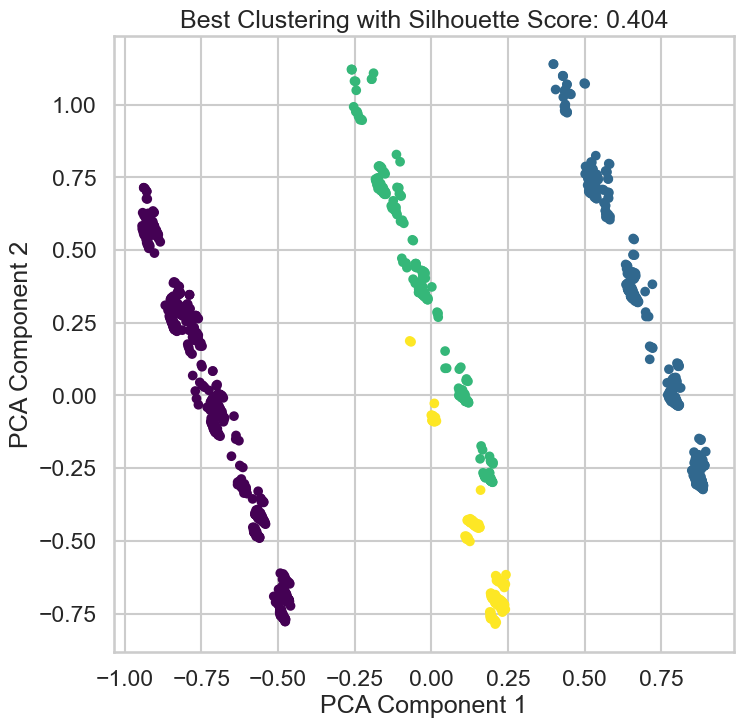

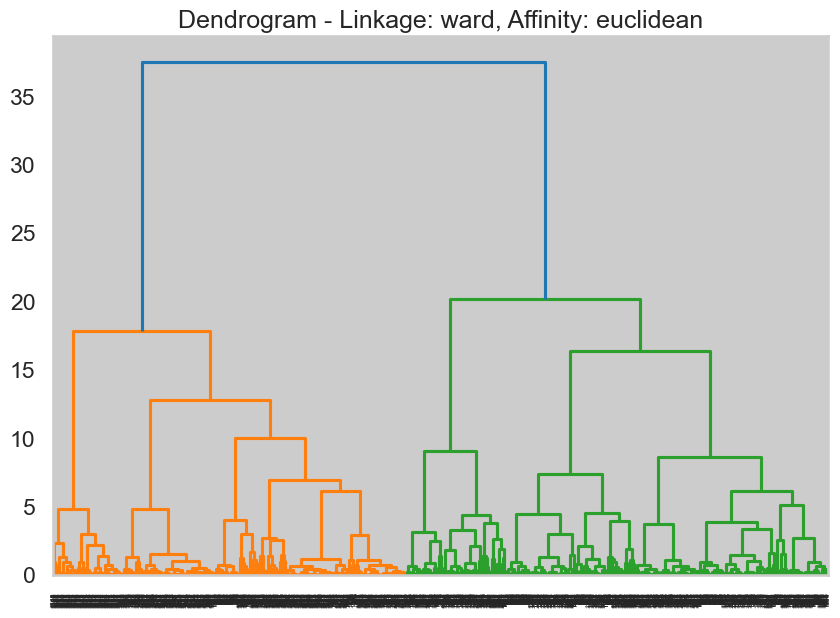

In [107]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'cus_scaled' is already scaled and has 8 features
best_score = -1
best_params = {}
best_model = None

# Define combinations of parameters to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkage_methods = ['ward', 'complete', 'average', 'single']
distance_thresholds = np.arange(7, 20)

# Try each combination of parameters
for affinity in affinities:
    for linkage_method in linkage_methods:
        for distance_threshold in distance_thresholds:
            if linkage_method == "ward" and affinity != "euclidean":
                continue
            
            # Fit AgglomerativeClustering model
            model = AgglomerativeClustering(metric=affinity, linkage=linkage_method, 
                                            distance_threshold=distance_threshold, n_clusters=None)
            model.fit(cus_scaled)

            # Calculate silhouette score
            if len(set(model.labels_)) > 1:  # Require more than one cluster
                score = silhouette_score(cus_scaled, model.labels_)
                
                # Track the best configuration
                if score > best_score:
                    best_score = score
                    best_params = {'affinity': affinity, 'linkage': linkage_method, 'distance_threshold': distance_threshold}
                    best_model = model

print(f"Best silhouette score: {best_score:.3f} with parameters: {best_params}")

# Train the best model with the best parameters on the scaled data
best_model = AgglomerativeClustering(metric=best_params['affinity'], linkage=best_params['linkage'], 
                                     distance_threshold=best_params['distance_threshold'], n_clusters=None)
best_model.fit(cus_scaled)

# Print the number of clusters found by the best model
n_clusters = len(set(best_model.labels_))
print(f"Number of clusters formed: {n_clusters}")

# Display clusters for the best model (reduce to 2D using PCA for visualization)
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
cus_scaled_pca = pca.fit_transform(cus_scaled)

plt.scatter(cus_scaled_pca[:, 0], cus_scaled_pca[:, 1], c=best_model.labels_, cmap="viridis", s=30)
plt.title(f"Best Clustering with Silhouette Score: {best_score:.3f}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Plot the dendrogram for the best configuration
dendrogram_metric = 'cityblock' if best_params['affinity'] == 'manhattan' else best_params['affinity']
Z = linkage(cus_scaled, method=best_params['linkage'], metric=dendrogram_metric)

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title(f"Dendrogram - Linkage: {best_params['linkage']}, Affinity: {best_params['affinity']}")
plt.show()

# DBSCAN

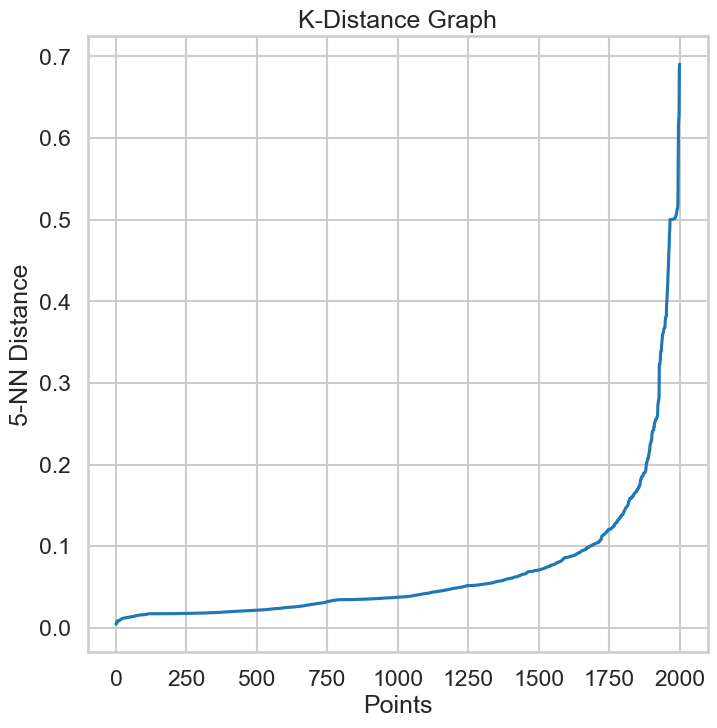

In [109]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Compute distances
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(cus_scaled)
distances, indices = neighbors_fit.kneighbors(cus_scaled)

# Sort and plot distances
distances = np.sort(distances[:, -1], axis=0)
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('5-NN Distance')
plt.title('K-Distance Graph')
plt.show()

Best Parameters (EPS, min_samples): (0.30000000000000004, 5)
Best Silhouette Score: 0.6183605686166695
Number of Clusters for Best Parameters: 53


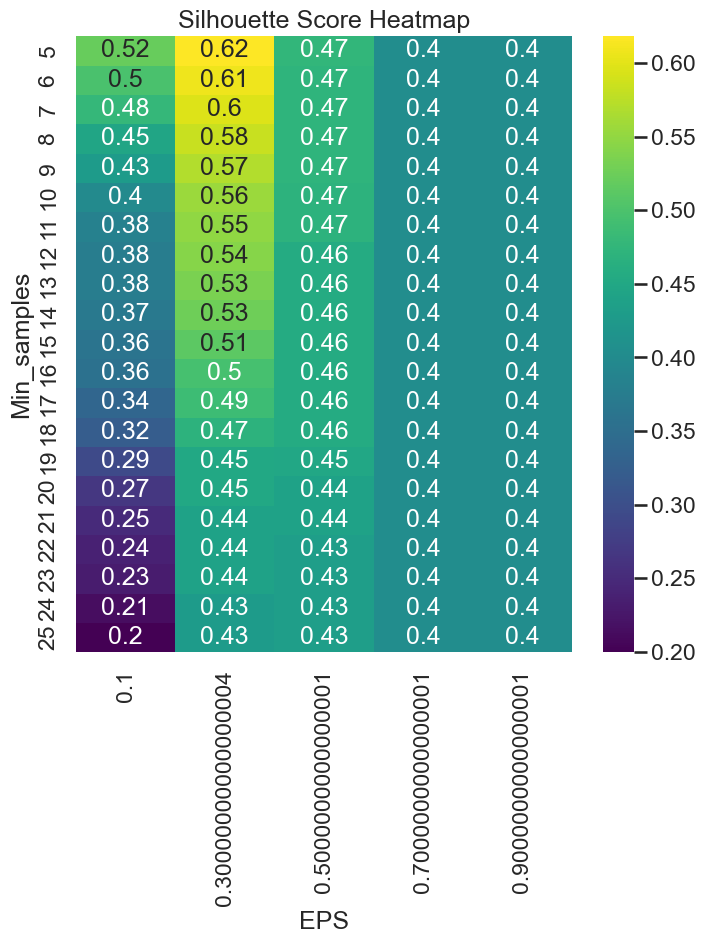

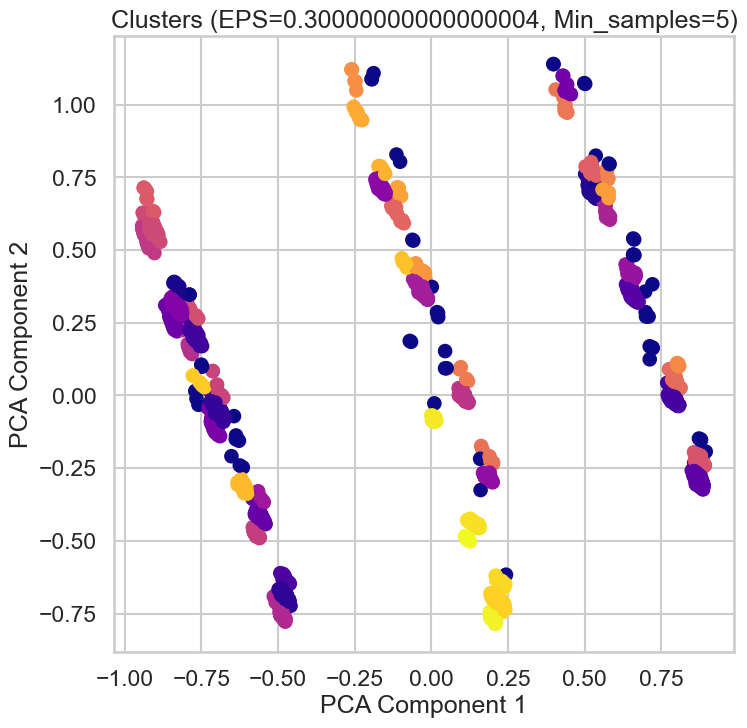

In [110]:
results = []

# Define ranges for EPS and min_samples
eps_values = np.arange(0.1, 3, 0.2)
min_samples_values = range(5, 26)

# Loop through EPS and min_samples values
for eps in eps_values:
    for min_samples in min_samples_values:
        # Fit DBSCAN model
        model = DBSCAN(eps=eps, min_samples=min_samples).fit(cus_scaled)
        labels = model.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise points

        # Calculate silhouette score if there is more than one cluster
        if n_clusters > 1:
            score = silhouette_score(cus_scaled, labels)
            results.append((eps, min_samples, score, n_clusters))

# Find the best parameters based on silhouette score
best_params = max(results, key=lambda x: x[2])
print("Best Parameters (EPS, min_samples):", best_params[0:2])
print("Best Silhouette Score:", best_params[2])
print("Number of Clusters for Best Parameters:", best_params[3])

# Convert results into DataFrame with only the relevant columns
results_df = pd.DataFrame(results, columns=['EPS', 'Min_samples', 'Silhouette_score', 'Number_of_Clusters'])

# Drop the 'Number_of_Clusters' column to focus on the three relevant columns
results_df = results_df[['EPS', 'Min_samples', 'Silhouette_score']]

# Plot Silhouette_score heatmap
pivot_table = results_df.pivot(index="Min_samples", columns="EPS", values="Silhouette_score")
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.title("Silhouette Score Heatmap")
plt.show()

# Train DBSCAN with the best parameters
best_eps, best_min_samples, _, n = best_params
model = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(cus_scaled)
labels = model.labels_

# Reduce dimensionality for visualization using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
cus_scaled_pca = pca.fit_transform(cus_scaled)

# Plot clusters
plt.scatter(cus_scaled_pca[:, 0], cus_scaled_pca[:, 1], c=labels, cmap='plasma')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Clusters (EPS={best_eps}, Min_samples={best_min_samples})")
plt.show()

Best DBSCAN Model: {'eps': 0.552542372881356, 'min_samples': 5, 'num_clusters': 4}
Best Davies-Bouldin Index: 0.9257


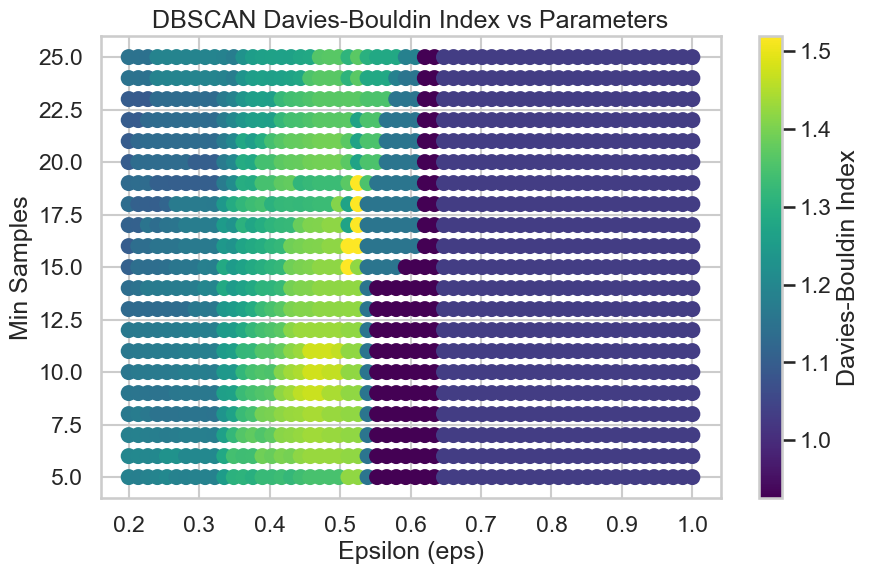

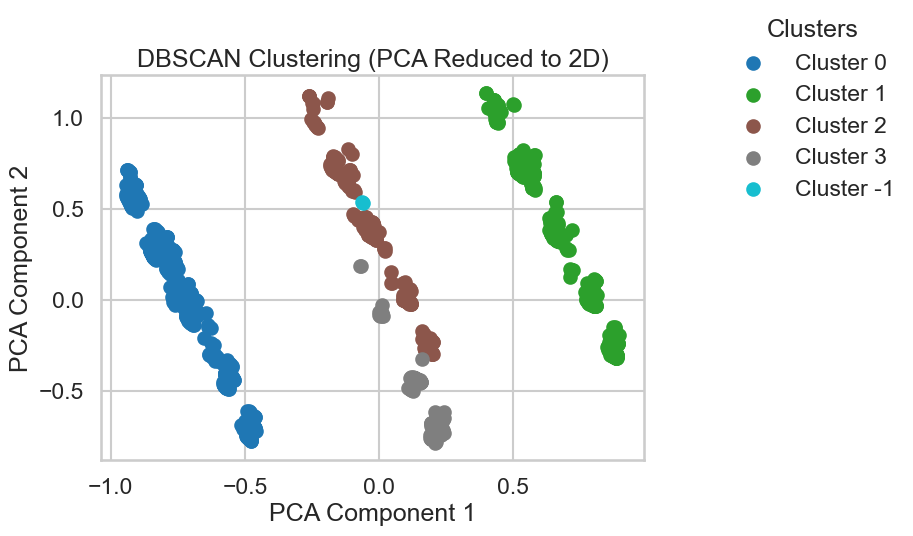

In [111]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define parameter search space
eps_values = np.linspace(0.2, 1, 60)
min_samples_values = range(5, 26)  # From 5 to 25

best_score = float('inf')  # Lower DBI is better
best_params = {}

dbi_scores = {}

# Iterate over different values of EPS and Min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(cus_scaled)

        # Ignore noise points (-1 label)
        unique_clusters = set(labels)
        if -1 in unique_clusters:
            unique_clusters.remove(-1)
        num_clusters = len(unique_clusters)

        # Ensure valid clustering (at least 2 clusters)
        if num_clusters < 2:
            continue  

        # Compute Davies-Bouldin Index
        score = davies_bouldin_score(cus_scaled, labels)
        dbi_scores[(eps, min_samples)] = score

        # Store best model parameters (lower DBI is better)
        if score < best_score:
            best_score = score
            best_params = {"eps": eps, "min_samples": min_samples, "num_clusters": num_clusters}

# Print best model parameters
print(f"Best DBSCAN Model: {best_params}")
print(f"Best Davies-Bouldin Index: {best_score:.4f}")

# --- Plot DBI Score vs EPS and Min_samples ---
plt.figure(figsize=(10, 6))

x_vals = [k[0] for k in dbi_scores.keys()]  # Epsilon values
y_vals = [k[1] for k in dbi_scores.keys()]  # Min_samples values
z_vals = list(dbi_scores.values())  # DBI scores

# 2D scatter plot with color representing DBI score
scatter = plt.scatter(x_vals, y_vals, c=z_vals, cmap='viridis', s=100)
plt.colorbar(scatter, label="Davies-Bouldin Index")  # Add color legend
plt.xlabel("Epsilon (eps)")
plt.ylabel("Min Samples")
plt.title("DBSCAN Davies-Bouldin Index vs Parameters")
plt.show()

# --- Plot Clusters ---
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(cus_scaled)

# Train DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
labels = best_dbscan.fit_predict(cus_scaled)

# --- Plot Clusters in 2D (After PCA) ---
# --- Plot Clusters in 2D (After PCA) ---
plt.figure(figsize=(7, 5))
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # Assign colors

for label, color in zip(unique_labels, colors):
    mask = labels == label
    plt.scatter(reduced_data[mask, 0], reduced_data[mask, 1], color=color, label=f'Cluster {label}')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering (PCA Reduced to 2D)")

# Adjust legend position to avoid overlap
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.2), title="Clusters", frameon=False)

# Show plot with adjusted legend
plt.show()

In [112]:
#Extract non-noise points (ignore label -1)
valid_mask = labels != -1
valid_data = cus_scaled[valid_mask]  # Data points that are not noise
valid_labels = labels[valid_mask]   # Corresponding cluster labels

#Ensure we have at least 2 clusters
if len(set(valid_labels)) > 1:
    silhouette_avg = silhouette_score(valid_data, valid_labels)
    print(f"Silhouette Score for Best DBSCAN Clusters: {silhouette_avg:.4f}")
else:
    print("Silhouette Score cannot be computed (only one valid cluster found).")

Silhouette Score for Best DBSCAN Clusters: 0.4037
